In [1]:
'''
Decision Tree Classifier with Pre-Pruning and Post-Pruning
Pruning in decision trees is a technique used to reduce overfitting and improve model generalization.
It helps in removing unnecessary branches that do not contribute significantly to decision-making. 
There are two main types of pruning: Pre-Pruning and Post-Pruning.
'''

# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [3]:
# Separating X and y datasets
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [4]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Model building
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

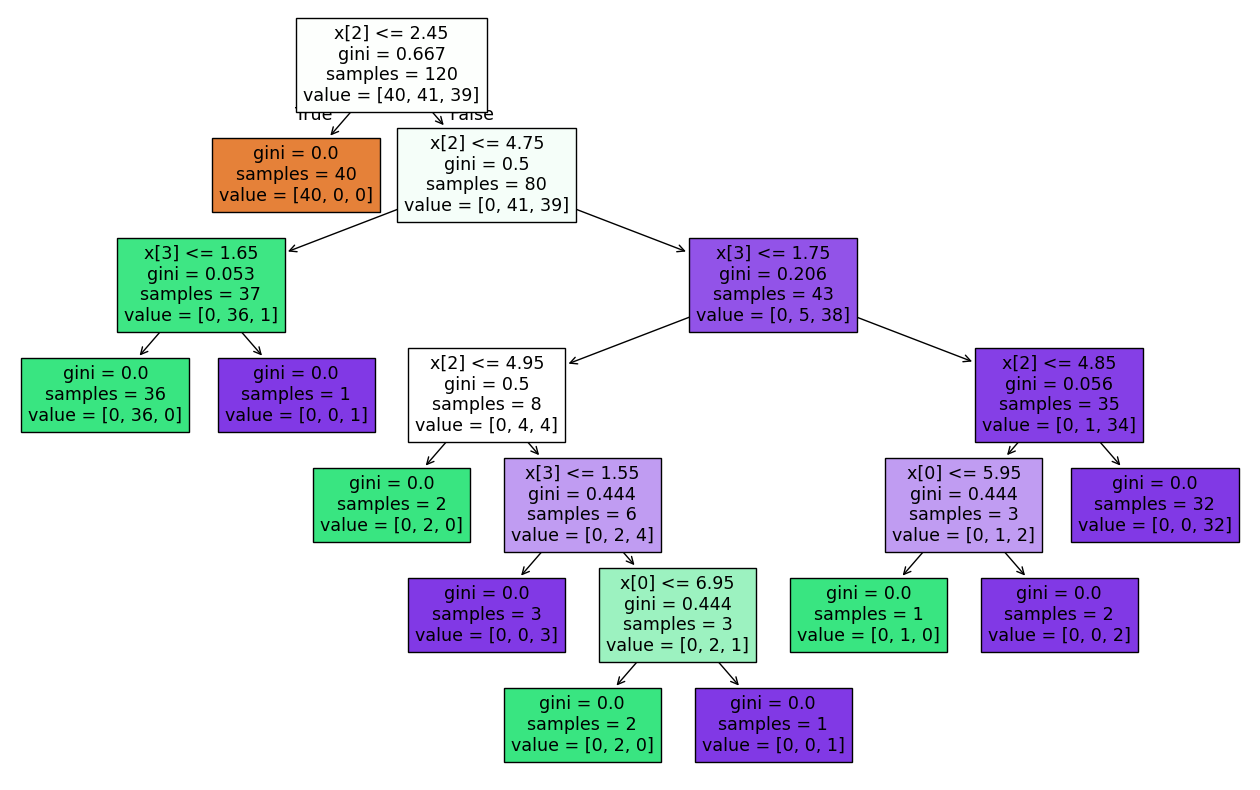

In [6]:
# Visualizing the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(dtree, filled=True)
plt.show()

In [7]:
# Model evaluation
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [8]:
# Training evaluation
print("\nTraining Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [9]:
# Test evaluation
print("\nTest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Post-pruning: (limiting tree depth)
dtree = DecisionTreeClassifier(max_depth=2)

In [11]:
# Model training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

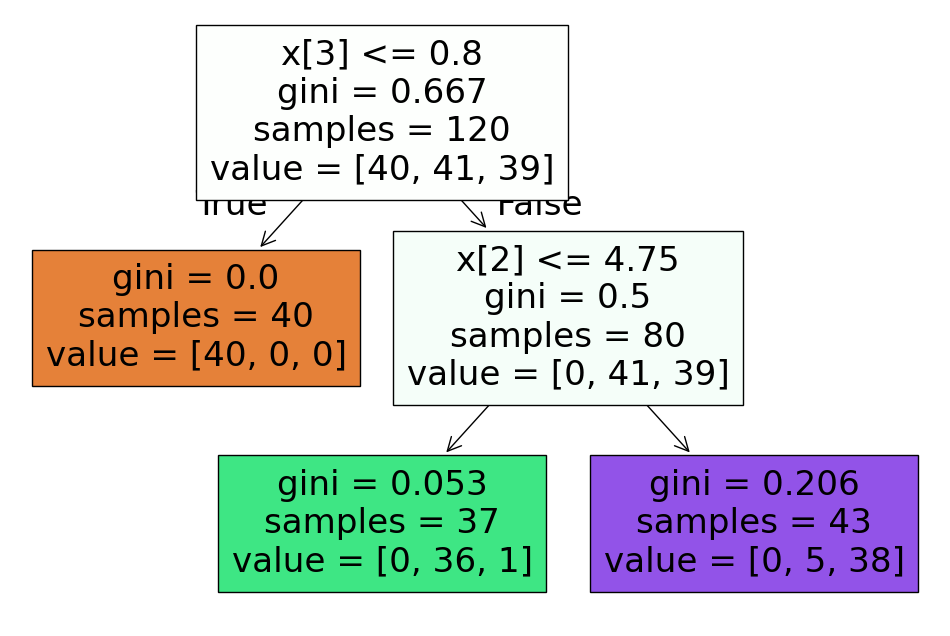

In [12]:
# Visualizing the pruned tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, filled=True)
plt.show()

In [13]:
# Model evaluation after pruning
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [14]:
# Training evaluation after pruning
print("\nTraining Evaluation (Post-pruning):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation (Post-pruning):
Accuracy: 0.95
Confusion Matrix:
 [[40  0  0]
 [ 0 36  5]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        41
           2       0.88      0.97      0.93        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [15]:
# Test evaluation after pruning
print("\nTest Evaluation (Post-pruning):")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation (Post-pruning):
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [16]:
# Pre-Pruning: Limiting the complexity of the tree

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(parameters)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2']}


In [17]:
dtree = DecisionTreeClassifier(
    max_depth=3,                  # Limit tree depth
    min_samples_split=4,          # Minimum samples to split
    min_samples_leaf=2,           # Minimum samples in a leaf node
    max_leaf_nodes=10,            # Maximum number of leaf nodes
    max_features=3                # Maximum number of features used for splitting
)

grid=GridSearchCV(
    dtree,
    param_grid=parameters,
    cv=5,
    scoring= 'accuracy',
    verbose=3
)


In [18]:
# Model training
grid.fit(X_train,y_train)
dtree.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

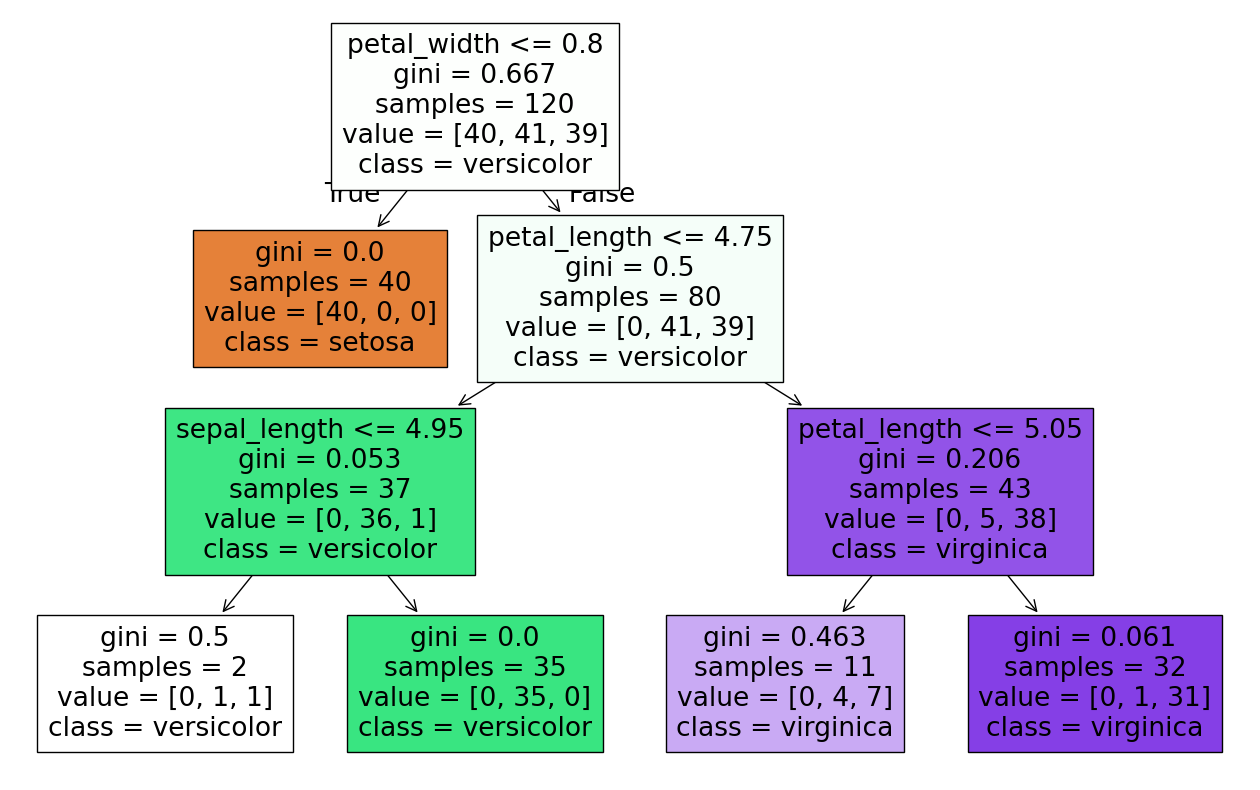

In [19]:
# Visualizing the pruned decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

In [20]:
# Model evaluation
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [21]:
# Training evaluation
print("\nTraining Evaluation (Pre-Pruning):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Training Evaluation (Pre-Pruning):
Accuracy: 0.95
Confusion Matrix:
 [[40  0  0]
 [ 0 36  5]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        41
           2       0.88      0.97      0.93        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [22]:
# Test evaluation
print("\nTest Evaluation (Pre-Pruning):")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Evaluation (Pre-Pruning):
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

